In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
dataset = sns.load_dataset("diamonds")
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
X = dataset[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values.reshape(-1,4)
y = dataset["Species"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [5]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

,Test,Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
21,Iris-versicolor,Iris-versicolor,0.01,0.71,0.28
14,Iris-versicolor,Iris-versicolor,0.00,0.71,0.29
12,Iris-versicolor,Iris-versicolor,0.00,0.79,0.20
4,Iris-setosa,Iris-setosa,0.97,0.03,0.00
35,Iris-versicolor,Iris-versicolor,0.05,0.88,0.07
11,Iris-versicolor,Iris-versicolor,0.01,0.81,0.18
20,Iris-virginica,Iris-virginica,0.00,0.19,0.81
24,Iris-virginica,Iris-virginica,0.00,0.43,0.57
36,Iris-setosa,Iris-setosa,0.94,0.06,0.00
23,Iris-setosa,Iris-setosa,0.98,0.02,0.00


In [6]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


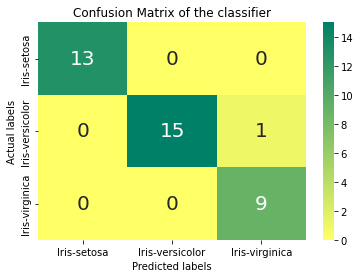

In [7]:
# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [8]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158
